In [2]:
import ENDFtk
import ACEtk
import scion

import matplotlib.pyplot as plot
%matplotlib notebook

In [3]:
# the files we want to look at
endffile = '../performance/u235.endf'

In [4]:
# open the ENDF file and retrieve the capture cross section
tape = ENDFtk.tree.Tape.from_file( endffile )
u235_nubar = tape.materials.front().file( 1 ).section( 452 ).parse()

print( 'number points: ', len( u235_nubar.nubar.energies ) )
print( 'interpolation types: ', u235_nubar.nubar.interpolants.to_list() )

number points:  85
interpolation types:  [2]


In [5]:
# create an InterpolationTable from the ENDF data and linearise the data
representation = scion.math.LinearLinearTable( x = u235_nubar.nubar.energies.to_list(),
                                               y = u235_nubar.nubar.multiplicities.to_list() )

linearised = representation.linearise() # default tolerance of 0.1%

print( 'number points: ', len( linearised.x ) )

number points:  85


<IPython.core.display.Javascript object>


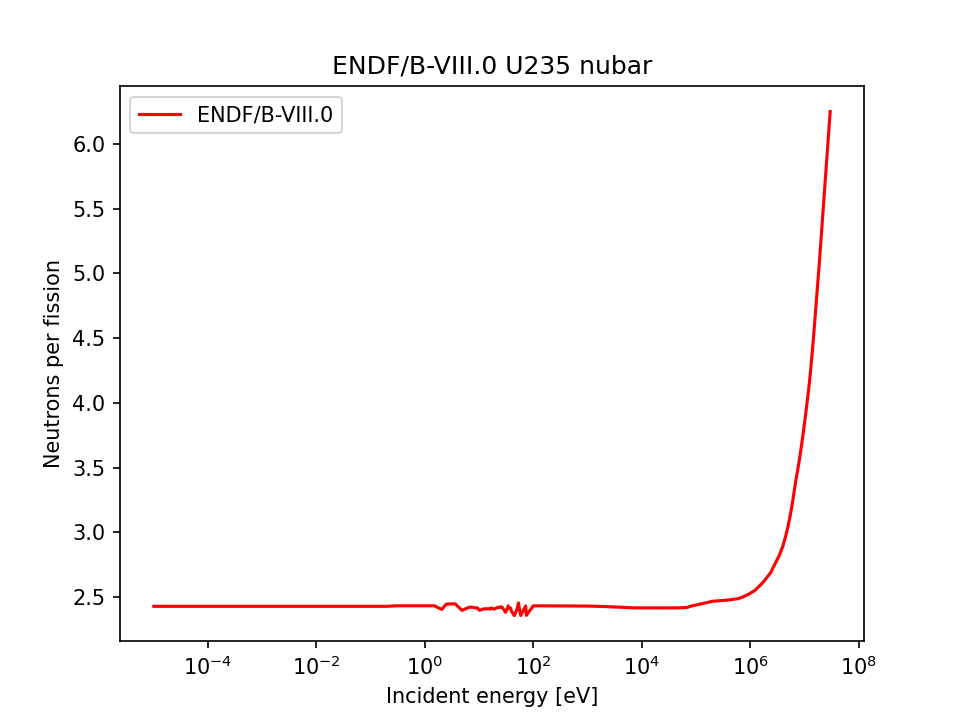

In [6]:
# plot the nubar data
plot.figure()
plot.plot( u235_nubar.nubar.energies, u235_nubar.nubar.multiplicities, label = 'ENDF/B-VIII.0', color = 'red', linewidth = 1.5 )
plot.xlabel( 'Incident energy [eV]' )
plot.ylabel( 'Neutrons per fission' )
plot.title( 'ENDF/B-VIII.0 U235 nubar' )
plot.xscale( 'log' )
plot.yscale( 'linear' )
plot.legend()
plot.show()

In [7]:
help( u235_nubar )

Help on Section in module ENDFtk.MF1.MT452 object:

class Section(pybind11_builtins.pybind11_object)
 |  MF1 MT452 section - the total number of fission neutrons
 |  
 |  Method resolution order:
 |      Section
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: ENDFtk.MF1.MT452.Section, zaid: float, awr: float, multiplicity: Union[ENDFtk.MF1.PolynomialMultiplicity, ENDFtk.MF1.TabulatedMultiplicity]) -> None
 |      
 |      Initialise the section
 |      
 |      Arguments:
 |          self            the section
 |          zaid            the ZA value of the material
 |          awr            the atomic weight ratio
 |          multiplicity    the multiplicity data
 |      
 |      2. __init__(self: ENDFtk.MF1.MT452.Section, section: ENDFtk.MF1.MT452.Section) -> None
 |      
 |      Initialise the section with anothe

In [8]:
help( scion.math.ChebyshevSeries )

Help on class ChebyshevSeries in module scion.math:

class ChebyshevSeries(pybind11_builtins.pybind11_object)
 |  A Chebyshev series function y -> f(x) = sum c_i T_i(x) of order n
 |  
 |  This class represents a Chebyshev series function y -> f(x) =
 |  sum c_i T_i(x) defined over the domain [-1,1].
 |  
 |  The Clenshaw recursion scheme is used for the evaluation of the series
 |  using the following recursion relation for Chebyshev polynomials:
 |    T_(n+1) = 2 x T_n - T_(n-1)
 |  
 |  Method resolution order:
 |      ChebyshevSeries
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(...)
 |      __call__(self: scion.math.ChebyshevSeries, x: float) -> float
 |      
 |      Evaluate the function for a value of x
 |      
 |      Arguments:
 |          self   the function
 |          x      the value to be evaluated
 |  
 |  __init__(...)
 |      __init__(self: scion.math.ChebyshevSeries, coefficients: List[float]) -> N